# 1.데이터 전처리

## 1.1 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [4]:
cd /content/drive/Othercomputers/내 노트북 (1)/[12장] LSTM 활용하기/[12장] LSTM 활용하기/4_12_2_LSTM 주가예측

/content/drive/Othercomputers/내 노트북 (1)/[12장] LSTM 활용하기/[12장] LSTM 활용하기/4_12_2_LSTM 주가예측


In [5]:
df = pd.read_excel("data_3649_20211226.xlsx")

In [6]:
df.head()

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2021/12/24,69400,-300,-0.43,69900,70800,69300,133359,9297680800,2771985140600,39942149
1,2021/12/23,69700,0,0.00,70100,70700,69000,159251,11074501500,2783967785300,39942149
2,2021/12/22,69700,-1300,-1.83,71200,71800,69600,200037,14032424200,2783967785300,39942149
3,2021/12/21,71000,300,0.42,71000,71700,70600,125537,8937661800,2835892579000,39942149
4,2021/12/20,70700,-2800,-3.81,72700,73200,70700,202988,14508582800,2823909934300,39942149


## 1.2 데이터 타입변경

In [7]:
df.rename(columns={"일자" : "date","종가" : "price", "등락률" : "fluctuations",
                   "거래량" : "volume", "상장주식수" : "nos" }, inplace= True)

In [8]:
df.head()

,date,price,대비,fluctuations,시가,고가,저가,volume,거래대금,시가총액,nos
0,2021/12/24,69400,-300,-0.43,69900,70800,69300,133359,9297680800,2771985140600,39942149
1,2021/12/23,69700,0,0.00,70100,70700,69000,159251,11074501500,2783967785300,39942149
2,2021/12/22,69700,-1300,-1.83,71200,71800,69600,200037,14032424200,2783967785300,39942149
3,2021/12/21,71000,300,0.42,71000,71700,70600,125537,8937661800,2835892579000,39942149
4,2021/12/20,70700,-2800,-3.81,72700,73200,70700,202988,14508582800,2823909934300,39942149


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3708 entries, 0 to 3707
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          3708 non-null   object 
 1   price         3708 non-null   int64  
 2   대비            3708 non-null   int64  
 3   fluctuations  3708 non-null   float64
 4   시가            3708 non-null   int64  
 5   고가            3708 non-null   int64  
 6   저가            3708 non-null   int64  
 7   volume        3708 non-null   int64  
 8   거래대금          3708 non-null   int64  
 9   시가총액          3708 non-null   int64  
 10  nos           3708 non-null   int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 318.8+ KB


In [10]:
df["date"] = pd.to_datetime(df["date"]).dt.strftime("%Y%m%d")

In [11]:
df.head()

,date,price,대비,fluctuations,시가,고가,저가,volume,거래대금,시가총액,nos
0,20211224,69400,-300,-0.43,69900,70800,69300,133359,9297680800,2771985140600,39942149
1,20211223,69700,0,0.00,70100,70700,69000,159251,11074501500,2783967785300,39942149
2,20211222,69700,-1300,-1.83,71200,71800,69600,200037,14032424200,2783967785300,39942149
3,20211221,71000,300,0.42,71000,71700,70600,125537,8937661800,2835892579000,39942149
4,20211220,70700,-2800,-3.81,72700,73200,70700,202988,14508582800,2823909934300,39942149


In [12]:
df = df.sort_values(by='date')

In [13]:
df.head()

,date,price,대비,fluctuations,시가,고가,저가,volume,거래대금,시가총액,nos
3707,20061226,122000,-1500,-1.21,124000,124000,119500,54765,6640054000,2440000000000,20000000
3706,20061227,120500,-1500,-1.23,122000,123000,119500,74326,8978359500,2410000000000,20000000
3705,20061228,119000,-1500,-1.24,122500,123000,119000,71823,8631758000,2380000000000,20000000
3704,20070102,122000,3000,2.52,120500,122000,119500,39985,4830730000,2440000000000,20000000
3703,20070103,121000,-1000,-0.82,122000,123500,120500,50647,6188138000,2420000000000,20000000


## 1.3 feature, label 설정

In [14]:
x = df.loc[:,['date','fluctuations','volume','nos']]

In [15]:
x.head()

,date,fluctuations,volume,nos
3707,20061226,-1.21,54765,20000000
3706,20061227,-1.23,74326,20000000
3705,20061228,-1.24,71823,20000000
3704,20070102,2.52,39985,20000000
3703,20070103,-0.82,50647,20000000


In [16]:
x.astype(float)

,date,fluctuations,volume,nos
3707,20061226.0,-1.21,54765.0,20000000.0
3706,20061227.0,-1.23,74326.0,20000000.0
3705,20061228.0,-1.24,71823.0,20000000.0
3704,20070102.0,2.52,39985.0,20000000.0
3703,20070103.0,-0.82,50647.0,20000000.0
...,...,...,...,...
4,20211220.0,-3.81,202988.0,39942149.0
3,20211221.0,0.42,125537.0,39942149.0
2,20211222.0,-1.83,200037.0,39942149.0
1,20211223.0,0.00,159251.0,39942149.0


In [17]:
y = df.loc[:,['price']]

In [18]:
y.head()

,price
3707,122000
3706,120500
3705,119000
3704,122000
3703,121000


In [19]:
y.astype(float)

,price
3707,122000.0
3706,120500.0
3705,119000.0
3704,122000.0
3703,121000.0
...,...
4,70700.0
3,71000.0
2,69700.0
1,69700.0


# 1.4 표준화(standardization)

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
scaled_x = standard_scaler.fit_transform(x)
scaled_y = standard_scaler.fit_transform(y)


In [ ]:
scaled_x

array([[-1.82968479, -0.40919945, -0.81163128, -0.49974716],
       [-1.82966166, -0.41569284, -0.70130153, -0.49974716],
       [-1.82963854, -0.41893954, -0.71541918, -0.49974716],
       ...,
       [ 1.63900041, -0.61049469,  0.00774522,  2.00101189],
       [ 1.63902354, -0.01634907, -0.22229973,  2.00101189],
       [ 1.63904666, -0.15595705, -0.36833817,  2.00101189]])

In [ ]:
print(scaled_y[:10])

[[ 0.08616448]
 [ 0.06165183]
 [ 0.03713918]
 [ 0.08616448]
 [ 0.06982271]
 [ 0.10250624]
 [ 0.08616448]
 [ 0.02896829]
 [-0.01188612]
 [-0.00371524]]


In [ ]:
x = scaled_x
y = scaled_y

# 1.5 훈련,테스트 데이터 분할

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x,y)

In [ ]:
x_train.shape, y_train.shape

((2781, 4), (2781, 1))

# 2. LSTM 설계

In [ ]:
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping 
K.clear_session() 
model = Sequential() # Sequeatial Model 
model.add(LSTM(20, input_shape=(4, 1))) # (timestep, feature) 
model.add(Dense(1)) # output = 1 
model.compile(optimizer="adam", loss="mae", metrics=["mse"])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                1760      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)

print(" start learning!")
history = model.fit(x_train, y_train, epochs=100,
          batch_size=30, verbose=1, callbacks=[early_stop])

 start learning!
Epoch 1/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3348 - mse: 0.2426
Epoch 2/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3348 - mse: 0.2412
Epoch 3/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3342 - mse: 0.2420
Epoch 4/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3326 - mse: 0.2372
Epoch 5/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3322 - mse: 0.2422
Epoch 6/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3331 - mse: 0.2412
Epoch 7/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3328 - mse: 0.2363
Epoch 8/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3322 - mse: 0.2395
Epoch 9/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3323 - mse: 0.2380
Epoch 10/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3325 - mse: 0.2411
Epoch 11/100
93/93 [======================

# 3. 예측

In [ ]:
y_pred = model.predict(x_valid)
print(y_pred[:10])

[[ 0.13409072]
 [ 0.13198583]
 [ 2.7537506 ]
 [ 0.26043725]
 [ 1.1881529 ]
 [ 0.32308957]
 [ 0.49082103]
 [ 1.7915002 ]
 [-0.51449513]
 [ 0.61567366]]


In [20]:
y.mean()

price    116727.346278
dtype: float64

In [21]:
y.std()

price    61201.148435
dtype: float64

In [27]:
def back_st(v1 = np.array):
    
    result = 61201.148435 * v1 + 116727.346278
    return result
    print(result)


In [30]:

prediction = np.array([[ 0.13409072],
 [ 0.13198583],
 [ 2.7537506 ],
 [ 0.26043725],
 [ 1.1881529 ],
 [ 0.32308957],
 [ 0.49082103],
 [ 1.7915002 ],
 [-0.51449513],
 [ 0.61567366]])

In [31]:
back_st(prediction)

array([[124933.85233648],
       [124805.03065115],
       [285260.04550157],
       [132666.40507325],
       [189443.66827438],
       [136500.79900937],
       [146766.15699005],
       [226369.21593953],
       [ 85239.65345779],
       [154407.28133118]])

# 4. 모델평가

In [ ]:
results = model.evaluate(x_valid, y_valid, batch_size=128)
print('test loss, test acc:', results)

8/8 [==============================] - 0s 4ms/step - loss: 0.3447 - mse: 0.2635
test loss, test acc: [0.34474697709083557, 0.26354554295539856]


In [ ]:
import matplotlib.pyplot as plt


def draw_graph(prediction, label, history):
    X = prediction / np.max(prediction, axis=0)
    Y = label / np.max(label, axis=0)

    minval = min(np.min(X), np.min(Y))
    maxval = max(np.max(X), np.max(Y))

    fig = plt.figure(figsize=(8, 8))
    plt.title("Regression Result")
    plt.xlabel("Ground Truth")
    plt.ylabel("AI Predict")
    plt.scatter(X, Y)
    plt.plot([minval, maxval], [minval, maxval], "red")
    fig.savefig("result.png")

    train_history = history.history["loss"] 
    fig = plt.figure(figsize=(8, 8))
    plt.title("Loss History")
    plt.xlabel("EPOCH")
    plt.ylabel("LOSS Function")
    plt.plot(train_history, "red")  
    fig.savefig("train_history.png")

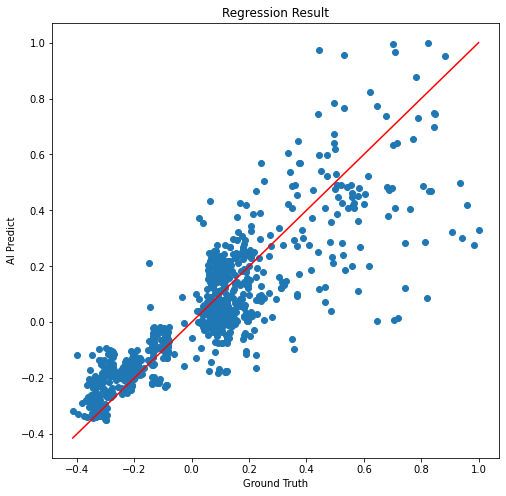

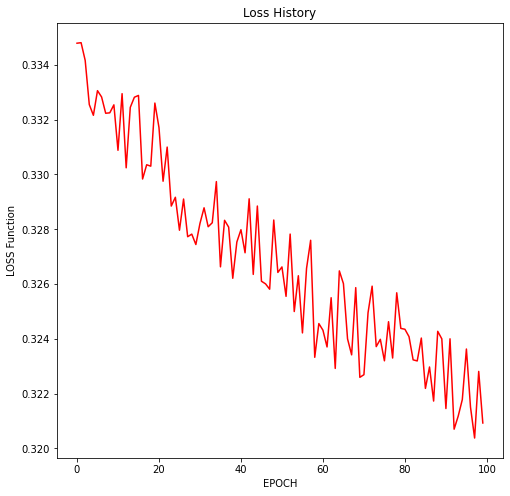

In [ ]:
draw_graph(model(x_valid), y_valid, history)